In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hadisahrul","key":"3884ebbfcaaeb3dbc1e9f5914360e6fc"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle datasets download -d cpluzshrijayan/milkquality

  0% 0.00/1.24k [00:00<?, ?B/s]
100% 1.24k/1.24k [00:00<00:00, 1.97MB/s]


In [ ]:
!mkdir milkquality
!unzip milkquality.zip -d milkquality
!ls milkquality

Archive:  milkquality.zip
  inflating: milkquality/milknew.csv  
milknew.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score,confusion_matrix

In [ ]:
data = pd.read_csv('milkquality/milknew.csv')
data.shape

(1059, 8)

In [ ]:
data.head(5)

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [ ]:
data.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [ ]:
data.isna().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

In [ ]:
data.groupby('Grade').size()

Grade
high      256
low       429
medium    374
dtype: int64

In [ ]:
data['Grade']=data['Grade'].map({'low':0,'medium':1,'high':2})
data.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,2
1,6.6,36,0,1,0,1,253,2
2,8.5,70,1,1,1,1,246,0
3,9.5,34,1,1,0,1,255,0
4,6.6,37,0,0,0,0,255,1


<Axes: >

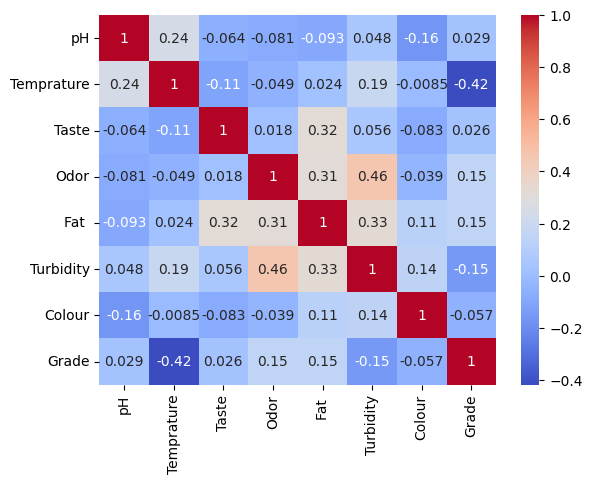

In [ ]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

<Axes: xlabel='pH', ylabel='count'>

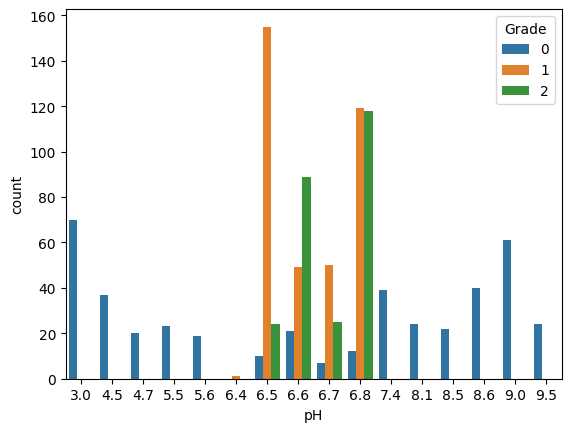

In [ ]:
sns.countplot(x=data['pH'],hue=data['Grade'], palette = "tab10")

<Axes: xlabel='Temprature', ylabel='count'>

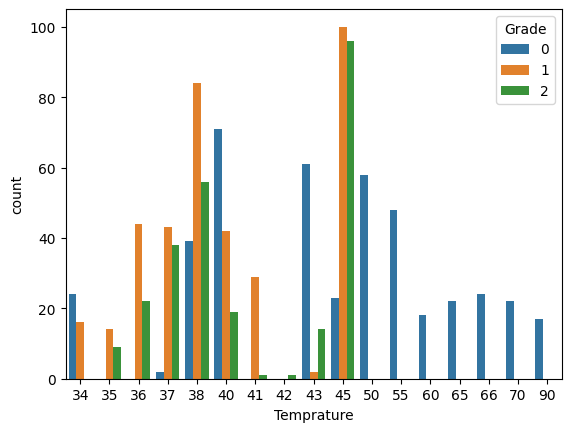

In [ ]:
sns.countplot(x=data['Temprature'],hue=data['Grade'], palette = "tab10")

<Axes: xlabel='Odor', ylabel='count'>

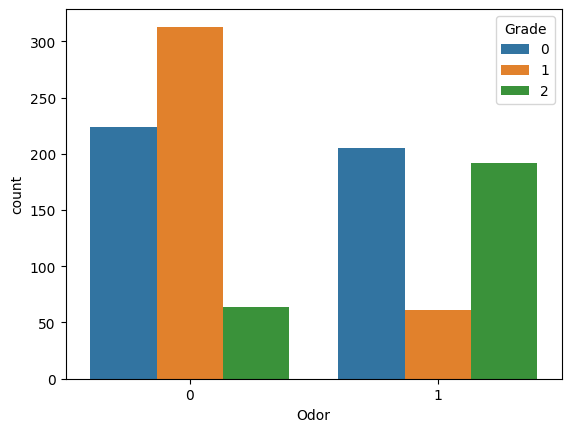

In [ ]:
sns.countplot(x=data['Odor'],hue=data['Grade'], palette = "tab10")

<Axes: xlabel='Turbidity', ylabel='count'>

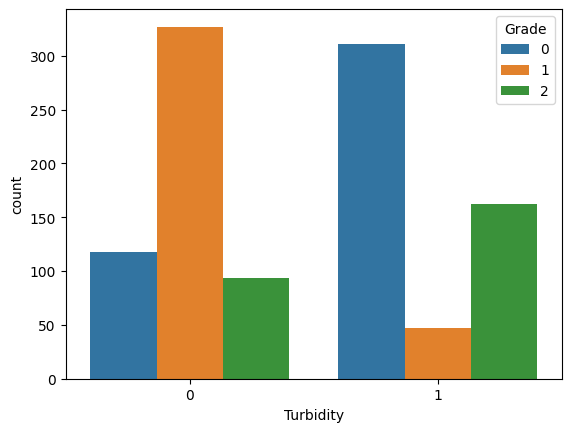

In [ ]:
sns.countplot(x=data['Turbidity'],hue=data['Grade'], palette = "tab10")

<Axes: xlabel='Colour', ylabel='count'>

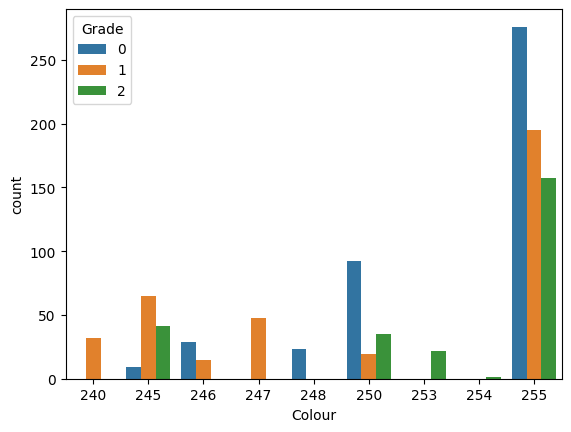

In [ ]:
sns.countplot(x=data['Colour'],hue=data['Grade'], palette = "tab10")

In [ ]:
X=data.drop(['Grade'],axis=1)
y=data['Grade']

In [54]:
from sklearn import linear_model
lr= linear_model.LogisticRegression(random_state = 42,max_iter= 100)

In [127]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.8,random_state=42)

In [56]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

In [57]:
rf.score(X_test, y_test)

0.9952830188679245

In [90]:
input_data_milk = np.array([[8.5,	35,	1, 1,	1, 1, 255]])


rf_preds=rf.predict(input_data_milk)
print('Prediksi Kualitas susu:', rf_preds)

Prediksi Kualitas susu: [0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import pickle

filename = "milk.sav"
pickle.dump(rf,open(filename,'wb'))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.88      0.70      0.78       352
           1       0.83      0.92      0.87       302
           2       0.54      0.64      0.58       194

    accuracy                           0.77       848
   macro avg       0.75      0.75      0.75       848
weighted avg       0.78      0.77      0.77       848

Accuracy Score:  0.7653301886792453


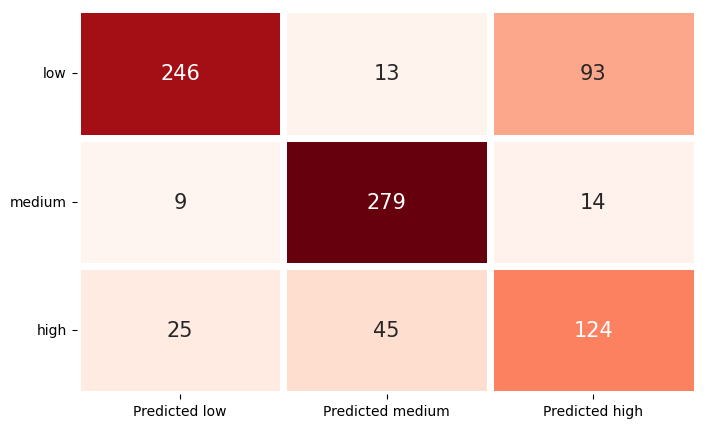

In [130]:
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, roc_curve, auc
rf_preds = lr.fit(X_train, y_train).predict(X_test)
cm = confusion_matrix(y_test,rf_preds)

print(classification_report(y_test, rf_preds))
print('Accuracy Score: ',accuracy_score(y_test, rf_preds))

plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Reds', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15},
            yticklabels = ['low','medium','high'], xticklabels = ['Predicted low', 'Predicted medium', 'Predicted high'])
plt.yticks(rotation = 0)
plt.show()
